In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [21]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
Age               918 non-null int64
Sex               918 non-null object
ChestPainType     918 non-null object
RestingBP         918 non-null int64
Cholesterol       918 non-null int64
FastingBS         918 non-null int64
RestingECG        918 non-null object
MaxHR             918 non-null int64
ExerciseAngina    918 non-null object
Oldpeak           918 non-null float64
ST_Slope          918 non-null object
HeartDisease      918 non-null int64
dtypes: float64(1), int64(6), object(5)
memory usage: 68.2+ KB


In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# Count plot

>seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.

In [25]:
df.Sex.value_counts()

M    725
F    193
Name: Sex, dtype: int64

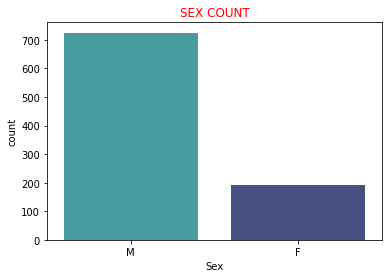

In [76]:
sns.countplot(x="Sex", data=df, palette="mako_r")
plt.title("SEX COUNT", size=12, color='red')
plt.show()

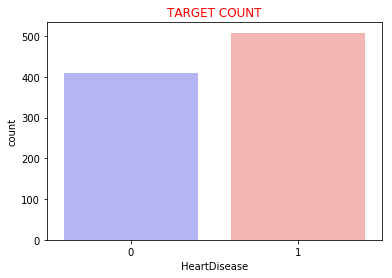

In [77]:
sns.countplot(x="HeartDisease", data=df, palette="bwr")
plt.title("TARGET COUNT", size=12, color='red')
plt.show()

# Distplot

> The seaborn.distplot() represents the univariate distribution of data i.e. data distribution of a variable against the density distribution.

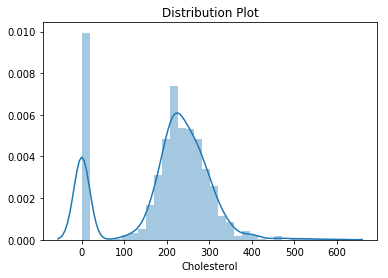

In [78]:
plt.title("Distribution Plot")
sns.distplot(df["Cholesterol"])
plt.show()

# Scatter Plot

> A scatterplot is a type of data display that shows the relationship between two numerical variables.

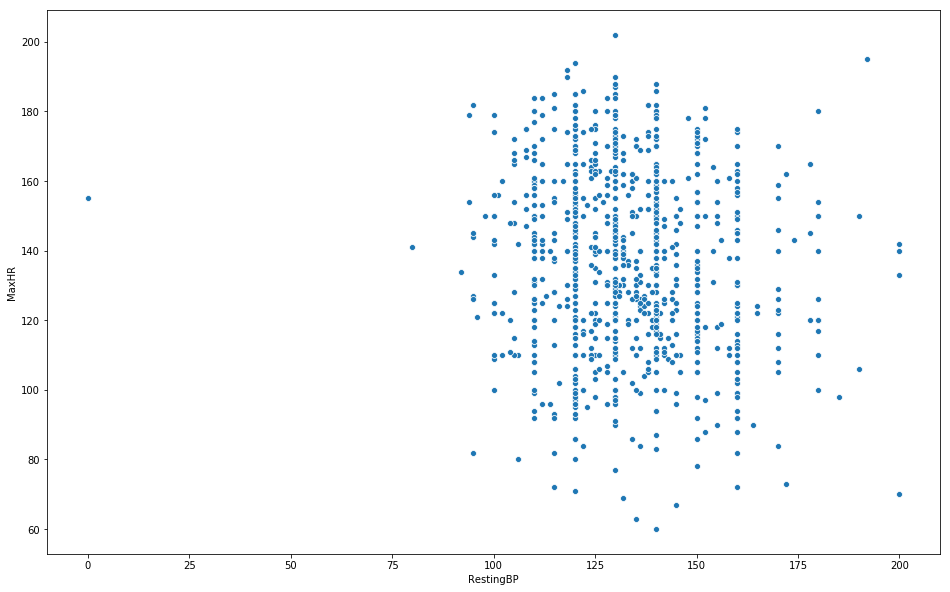

In [41]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x=df.RestingBP, y=df.MaxHR)
plt.show()

# Grouped BarPlot

> A bar plot or bar chart is a graph that represents the category of data with rectangular bars with lengths and heights that is proportional to the values which they represent.

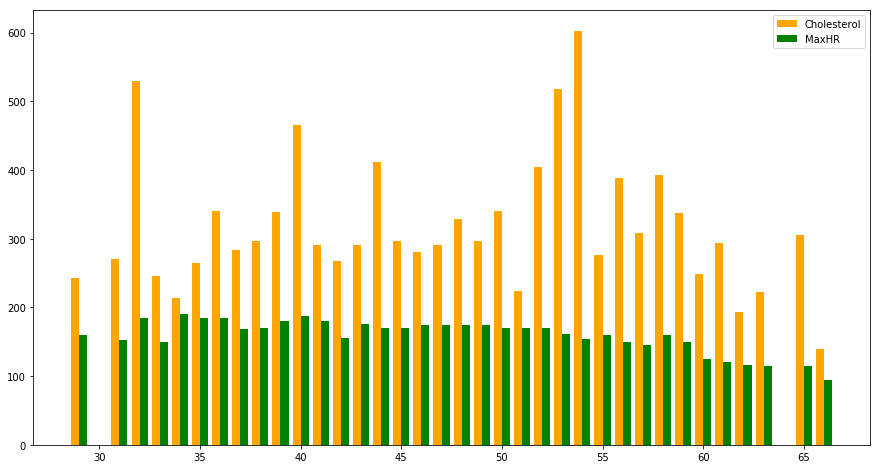

In [42]:
plt.figure(figsize=(15,8))
width=0.4
plt.bar(df.Age[:200]-0.2, df.Cholesterol[:200], width, color="orange")
plt.bar(df.Age[:200]+0.2, df.MaxHR[:200], width, color="green")
plt.legend(['Cholesterol', 'MaxHR'])
plt.show()

**pandas.crosstab()**

 *Same as pivot_table()*

> Crosstabs are used for categorical data, while pivot tables can be used for both categorical and numerical data. Crosstabs are used to analyze the relationship between two categorical variables, while pivot tables can analyze the relationships between multiple variables, both categorical and numerical.




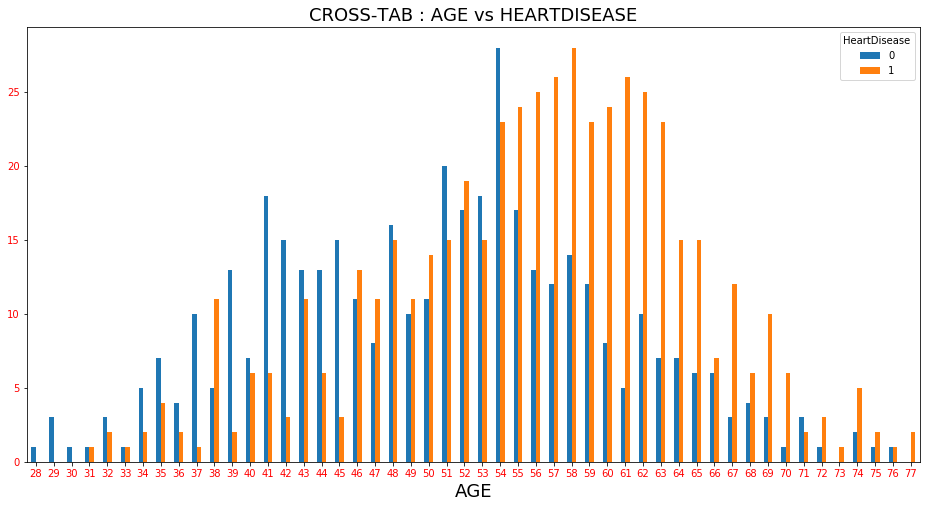

In [45]:
pd.crosstab(df.Age, df.HeartDisease).plot(kind="bar", figsize=(16,8))
plt.xticks(rotation="horizontal", color='red')
plt.yticks(color='red')
plt.title("CROSS-TAB : AGE vs HEARTDISEASE", size=18)
plt.xlabel("AGE", size="18")
plt.show()

# Histogram

> A histogram is a representation of the distribution of data.

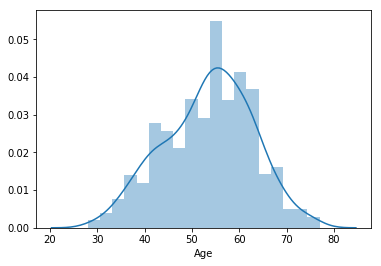

In [50]:
sns.distplot(df['Age'], kde=True)

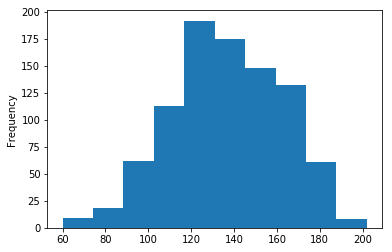

In [51]:
df.MaxHR.plot(kind="hist")

In [52]:
hist_lis = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
hist_lis

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

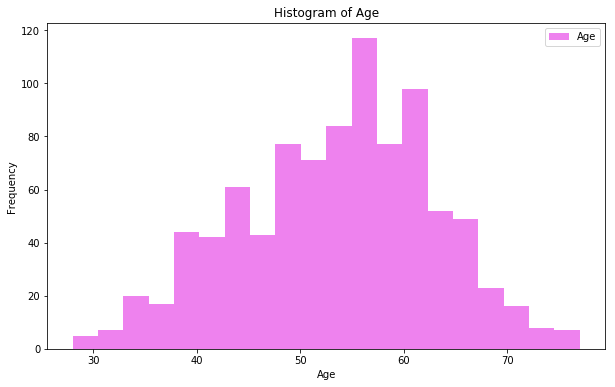

In [63]:
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color="violet")
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['Age'])  # Provide legend labels directly here
plt.show()

([<matplotlib.patches.Wedge at 0xb2354f0>,
 [Text(0.610067,0.915324,'low'),
  Text(-1.04192,-0.352698,'mid'),
  Text(0.871342,-0.67139,'hight')])

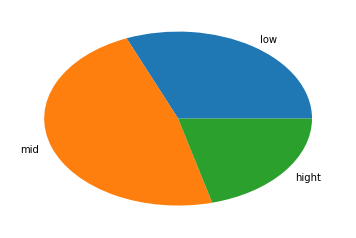

In [75]:
dp = df.HeartDisease
ns = dp.groupby(pd.cut(df['RestingBP'],[100,120,140,160])).count()
plt.pie(ns,labels=['low','mid','hight'])